#Модуль А

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from pylab import rcParams

In [ ]:
smoking_dataframe = pd.read_csv('smoking_data.csv', sep = ";") #загрузка датасета в формате pandas dataframe

In [ ]:
smoking_dataframe.head(5) #вывод первых 5 объектов датасета

,ID,gender,age,height(cm),weight(kg),waist(cm),"eyesight(left, right)","hearing(left, right)",systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,F,40.0,155.0,60.0,81.3,"1.2, 1.0","1.0, 1.0",114.0,73.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,N,Y,N
1,1,F,40.0,160.0,60.0,81.0,"0.8, 0.6","1.0, 1.0",119.0,70.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,N,Y,N
2,2,M,55.0,170.0,60.0,80.0,"0.8, 0.8","1.0, 1.0",138.0,86.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,N,N,Y
3,3,M,40.0,165.0,70.0,88.0,"1.5, 1.5","1.0, 1.0",100.0,60.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,N,Y,N
4,4,F,40.0,155.0,60.0,86.0,"1.0, 1.0","1.0, 1.0",120.0,74.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,N,N,N


In [ ]:
#Смотри на то, какие названия у столбцов, смотрим на значения признаков в столбцах, не вошедших в вывод через команду head

In [ ]:
smoking_dataframe.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left, right)', 'hearing(left, right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [ ]:
smoking_dataframe['fasting blood sugar']

0         94.0
1        130.0
2         89.0
3         96.0
4         80.0
         ...  
55687     89.0
55688      NaN
55689     88.0
55690    107.0
55691     82.0
Name: fasting blood sugar, Length: 55692, dtype: float64

In [ ]:
smoking_dataframe['Cholesterol']

0        215.0
1        192.0
2        242.0
3        322.0
4        184.0
         ...  
55687    213.0
55688    166.0
55689    158.0
55690    210.0
55691    213.0
Name: Cholesterol, Length: 55692, dtype: float64

In [ ]:
smoking_dataframe['triglyceride']

0          NaN
1          NaN
2        182.0
3        254.0
4         74.0
         ...  
55687     99.0
55688     69.0
55689     77.0
55690     79.0
55691      NaN
Name: triglyceride, Length: 55692, dtype: float64

In [ ]:
smoking_dataframe['HDL'] 

0        73.0
1        42.0
2        55.0
3        45.0
4        62.0
         ... 
55687    75.0
55688    73.0
55689    79.0
55690    48.0
55691     NaN
Name: HDL, Length: 55692, dtype: float64

##Анализ данных, перекодирование признаков

In [ ]:
#Необходимо разделить столбцы eyesight(left, right)	hearing(left, right) на четыре 

In [ ]:
new_df_eyes = smoking_dataframe['eyesight(left, right)'].str.split(',',expand=True)

In [ ]:
new_df_eyes.columns = ['eyesight_left', 'eyesight_right']

In [ ]:
new_df_eyes

,eyesight_left,eyesight_right
0,1.2,1.0
1,0.8,0.6
2,0.8,0.8
3,1.5,1.5
4,1.0,1.0
...,...,...
55687,0.9,0.9
55688,1.2,1.2
55689,1.0,1.2
55690,NaN,NaN


In [ ]:
new_df_hear = smoking_dataframe['hearing(left, right)'].str.split(',',expand=True)

In [ ]:
new_df_hear.columns = ['hear_left', 'hear_right']

In [ ]:
new_df_hear

,hear_left,hear_right
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
55687,1.0,1.0
55688,1.0,1.0
55689,1.0,1.0
55690,1.0,1.0


In [ ]:
smoking_dataframe = smoking_dataframe.join(new_df_eyes) #добавляем перекодированные столбцы

In [ ]:
smoking_dataframe = smoking_dataframe.join(new_df_hear)

In [ ]:
smoking_dataframe.head(5) #вывод первых 5 объектов датасета

,ID,gender,age,height(cm),weight(kg),waist(cm),"eyesight(left, right)","hearing(left, right)",systolic,relaxation,...,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight_left,eyesight_right,hear_left,hear_right
0,0,F,40.0,155.0,60.0,81.3,"1.2, 1.0","1.0, 1.0",114.0,73.0,...,18.0,19.0,27.0,N,Y,N,1.2,1.0,1.0,1.0
1,1,F,40.0,160.0,60.0,81.0,"0.8, 0.6","1.0, 1.0",119.0,70.0,...,22.0,19.0,18.0,N,Y,N,0.8,0.6,1.0,1.0
2,2,M,55.0,170.0,60.0,80.0,"0.8, 0.8","1.0, 1.0",138.0,86.0,...,21.0,16.0,22.0,N,N,Y,0.8,0.8,1.0,1.0
3,3,M,40.0,165.0,70.0,88.0,"1.5, 1.5","1.0, 1.0",100.0,60.0,...,19.0,26.0,18.0,N,Y,N,1.5,1.5,1.0,1.0
4,4,F,40.0,155.0,60.0,86.0,"1.0, 1.0","1.0, 1.0",120.0,74.0,...,16.0,14.0,22.0,N,N,N,1.0,1.0,1.0,1.0


In [ ]:
smoking_dataframe = smoking_dataframe.drop(columns = ['eyesight(left, right)', 'hearing(left, right)']) #выбрасываем из датафрейма старые объединённые признаки

##Перекодирование категориальных и бинарных признаков, заполнение пропусков

In [ ]:
#Перекодируем бинарные признаки методом ordinal_encoding

In [ ]:
for elem in smoking_dataframe.drop(columns = ['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST','eyesight_left', 'eyesight_right', 'hear_left', 'hear_right',
       'ALT', 'Gtp'], axis = 1): 
  set_name = set(smoking_dataframe[elem]) #добавляем в множество уникальные значения марок автомобилей
map_name = {}
i = 0
for elem in set_name:
  map_name[elem] = i 
  i += 1
print(map_name) #добавляем в словарь для ordinal encoding

{'N': 0, 'Y': 1}


In [ ]:
map_gender = {'M': 0, 'F' : 1} # объявляем словарь на бинарный признак пола
map_all = {'N': 0, 'Y' : 1} # объявляем словарь на все прочие бинарные признаки
smoking_dataframe['gender'] =  smoking_dataframe['gender'].map(map_gender) # перекодируем бинарный признак 
smoking_dataframe['dental caries'] =  smoking_dataframe['dental caries'].map(map_all) # перекодируем бинарный признак
smoking_dataframe['tartar'] =  smoking_dataframe['tartar'].map(map_all) # перекодируем бинарный признак
smoking_dataframe['smoking'] =  smoking_dataframe['smoking'].map(map_all) # перекодируем бинарный признак

In [ ]:
smoking_dataframe.head(5) #смотрим, что всё перекодировалось успешно

,ID,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,...,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight_left,eyesight_right,hear_left,hear_right
0,0,1.0,40.0,155.0,60.0,81.3,114.0,73.0,94.0,215.0,...,18.0,19.0,27.0,0.0,1.0,0,1.2,1.0,1.0,1.0
1,1,1.0,40.0,160.0,60.0,81.0,119.0,70.0,130.0,192.0,...,22.0,19.0,18.0,0.0,1.0,0,0.8,0.6,1.0,1.0
2,2,0.0,55.0,170.0,60.0,80.0,138.0,86.0,89.0,242.0,...,21.0,16.0,22.0,0.0,0.0,1,0.8,0.8,1.0,1.0
3,3,0.0,40.0,165.0,70.0,88.0,100.0,60.0,96.0,322.0,...,19.0,26.0,18.0,0.0,1.0,0,1.5,1.5,1.0,1.0
4,4,1.0,40.0,155.0,60.0,86.0,120.0,74.0,80.0,184.0,...,16.0,14.0,22.0,0.0,0.0,0,1.0,1.0,1.0,1.0


In [ ]:
#Заполним пропуски. Выделим способ, которым можно это сделать:

In [ ]:
smoking_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               50000 non-null  float64
 2   age                  50000 non-null  float64
 3   height(cm)           50000 non-null  float64
 4   weight(kg)           50000 non-null  float64
 5   waist(cm)            50000 non-null  float64
 6   systolic             50000 non-null  float64
 7   relaxation           50000 non-null  float64
 8   fasting blood sugar  50000 non-null  float64
 9   Cholesterol          50000 non-null  float64
 10  triglyceride         50000 non-null  float64
 11  HDL                  50000 non-null  float64
 12  LDL                  50000 non-null  float64
 13  hemoglobin           50000 non-null  float64
 14  Urine protein        50000 non-null  float64
 15  serum creatinine     50000 non-null 

In [ ]:
smoking_dataframe = smoking_dataframe.dropna()

In [ ]:
smoking_dataframe.isnull().sum() #удалим пропуски из набора данных. Осталось более 5600 объектов дляо обучения

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
eyesight_left          0
eyesight_right         0
hear_left              0
hear_right             0
dtype: int64

##Визуализация

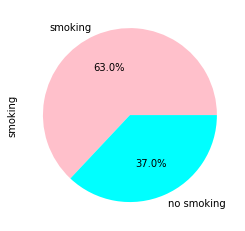

In [ ]:
labels = 'smoking', 'no smoking' 
colors = ['pink', 'cyan']
smoking_dataframe.smoking.value_counts().plot(kind = 'pie', labels = labels, autopct='%1.1f%%', colors=colors) #соотношение примерно 6 к 4. Выборка сбалансирована
#методы over или under sampling не требуются

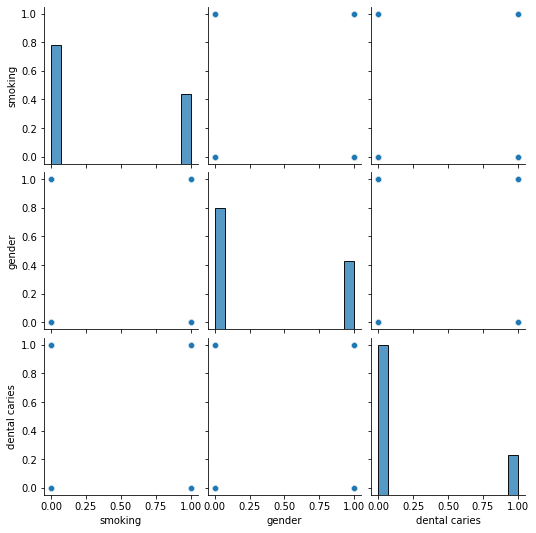

In [ ]:
cols = ['smoking', 'gender', 'dental caries']
sns_plot = sns.pairplot(smoking_dataframe[cols])  #строим график по бинарным признакам 
sns_plot.savefig('pairplot.png') # сохраняем график

In [ ]:
import plotly.express as px
#функции по отрисовке гистограмм с дисплеем 
def plot_histgram(feature):    
    fig = px.histogram(smoking_dataframe, x=feature,
                       color="smoking", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    )
    fig.show()

def display_stat(feature):
    mean = smoking_dataframe[feature].mean()
    std = smoking_dataframe[feature].std()
    skew = smoking_dataframe[feature].skew()
    kurtosis = smoking_dataframe[feature].kurtosis()
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [ ]:
plot_histgram('fasting blood sugar') #зависимость курения от уровня сахара в крови
display_stat('fasting blood sugar')

mean: 99.2571, std: 20.5696, skew: 4.1938, kurtosis: 28.7598 


#Модуль B

##Разбиение выборки на X и y, функция по оценке качеств модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [ ]:
X = smoking_dataframe.drop(columns = ['smoking']) #признаки объектов без целевого
y = smoking_dataframe['smoking'] #целевой признак

In [ ]:
def loss_func_classifier(df, model, y_test, y_pred, params):  # функция для оценки качества обученной модели
  te_ac = accuracy_score(y_test, y_pred).round(4) #используются основные метрики качества для задач классификации
  te_rec = recall_score(y_test, y_pred).round(4)
  te_prec = precision_score(y_test, y_pred).round(4)
  te_auc = roc_auc_score(y_test, y_pred).round(4)
  te_f1_score = f1_score(y_test, y_pred).round(4)
  new_row = {'model' : model, 'test_accuracy' : te_ac, 'test_recall' : te_rec, 'test_AUC' : te_auc, 'test_precision' : te_prec, 'f1_score' : te_f1_score, 'hyper_params' : params}
  df = df.append(new_row, ignore_index = True)
  return df

##2.1 Понижение размерности и отбор признаков

In [ ]:
#Для выявления того, насколько важен тот или иной признак воспользуемся методом отбора на основе важности признаков

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

In [ ]:
X.head(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,...,serum creatinine,AST,ALT,Gtp,dental caries,tartar,eyesight_left,eyesight_right,hear_left,hear_right
2,2,0.0,55.0,170.0,60.0,80.0,138.0,86.0,89.0,242.0,...,1.0,21.0,16.0,22.0,0.0,0.0,0.8,0.8,1.0,1.0
3,3,0.0,40.0,165.0,70.0,88.0,100.0,60.0,96.0,322.0,...,1.0,19.0,26.0,18.0,0.0,1.0,1.5,1.5,1.0,1.0
4,4,1.0,40.0,155.0,60.0,86.0,120.0,74.0,80.0,184.0,...,0.6,16.0,14.0,22.0,0.0,0.0,1.0,1.0,1.0,1.0
7,7,0.0,45.0,165.0,90.0,96.0,153.0,96.0,158.0,222.0,...,1.3,38.0,71.0,111.0,0.0,1.0,1.2,1.0,1.0,1.0
11,12,0.0,30.0,170.0,75.0,87.0,124.0,78.0,101.0,184.0,...,1.1,34.0,69.0,64.0,0.0,1.0,1.2,1.2,1.0,1.0


In [ ]:
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_) #видно, что у некоторых признаков вклад в значение целевого признака крайне мал. 
#Удалим данные те признаки из набора данных, значение которых < 0.03

[0.03590459 0.18079526 0.04513074 0.05853966 0.04488321 0.03693474
 0.0365445  0.0359697  0.03637212 0.03581867 0.05080229 0.03688943
 0.03564587 0.0529391  0.01106041 0.04161083 0.03564283 0.0374293
 0.0492855  0.01227495 0.01308955 0.0340884  0.03370194 0.00417797
 0.00446845]


In [ ]:
[X.columns[i] for i, v in enumerate(model.feature_importances_) if v < 0.03] #получаем индексы элементов списка - это самые неинформативные признаки

['Urine protein', 'dental caries', 'tartar', 'hear_left', 'hear_right']

In [ ]:
[X.columns[i] for i, v in enumerate(model.feature_importances_) if v > 0.04] #получаем индексы элементов списка - это самые информативные признаки

['gender',
 'age',
 'height(cm)',
 'weight(kg)',
 'triglyceride',
 'hemoglobin',
 'serum creatinine',
 'Gtp']

In [ ]:
X = X.drop(columns = ['Urine protein', 'dental caries', 'tartar', 'hear_left', 'hear_right']) #удаляем самые неинформативные признаки

In [ ]:
#Понизим размерность методом главных компонент
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3) #выбираем 3 компоненты
fit = pca.fit(X)
X_pca = fit.transform(X) #данные с пониженной размерностью

print("Данные с пониженной размерностью: ", fit.explained_variance_ratio_)
print(X_pca)

Данные с пониженной размерностью:  [9.99943436e-01 2.22835334e-05 1.15619628e-05]
[[ 2.80981855e+04  5.05768433e+01  5.55583419e+01]
 [ 2.80971825e+04  1.30011965e+02  1.56458097e+02]
 [ 2.80961903e+04 -5.94950388e+01 -6.49930971e+00]
 ...
 [-2.72658169e+04  1.26208597e+02  1.13996625e+02]
 [-2.73418077e+04 -8.50895550e+01 -1.98919253e+01]
 [-2.73808097e+04 -4.00373849e+01  4.32117033e-01]]


##2.2 Визуализация

In [ ]:
#отобразим несколько графиков, передающих зависимость целевого признака от прочих. В ходе построения графиков опираемся на результаты пункта 2.1
#['gender','age','height(cm)','weight(kg)','triglyceride','hemoglobin','serum creatinine','Gtp'] - самые информативные признаки

In [ ]:
smoking_graph = smoking_dataframe[[x for x in smoking_dataframe.columns if 'smoking' in x] + ['gender','age','height(cm)','weight(kg)','triglyceride','hemoglobin','serum creatinine','Gtp']]

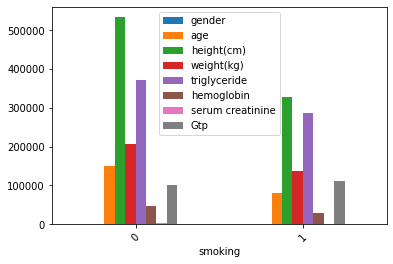

In [ ]:
smoking_graph.groupby('smoking').sum().plot(kind='bar', rot=45)  #из графика чётко прослеживается зависимость признака smoking от признаков, описанных выше

##2.3 Разбиение данных на обучающую и тестовую выборку

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y,  
                                     test_size=0.3, 
                                     random_state=smoking_dataframe.shape[0]) #разбиваем и перемешиваем выборку на обучающую и тестовую в отношении 7 к 3
scaler = StandardScaler() #производим скалирование выборки
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##2.4 Выбор модели 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import auc, roc_curve, classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score

In [ ]:
Loss = ({'model' : [], 'test_accuracy' : [], 'test_recall' :[] , 'test_AUC' :[], 'f1_score' : [], 'test_precision' : [], 'hyper_params' : []}) 
df_Loss_Cl = pd.DataFrame(Loss) #заводим пустой датафрейм, куда будут записывать метрики качества каждой обучаемой модели

###2.4.1 Decision Tree Classifier

In [ ]:
param_dist = {'splitter' : ['best', 'random'], 'max_depth' : np.arange(2, 100), 'min_samples_split' : np.arange(2, 25)}
DTC_model = DecisionTreeClassifier() #подбор гиперпараметров для дерева классификации
n_iter_search = 8 
random_search_DTC = RandomizedSearchCV(DTC_model, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search, 
                                   cv=10, 
                                   scoring='roc_auc') 
random_search_DTC.fit(X_train, y_train) 
best_params_DTC = random_search_DTC.best_params_
print("Лучшие параметры: {}".format(random_search_DTC.best_params_)) #получаем гиперпараметры для нашего дерева посредством рандомизированного поиска по сетке


Лучшие параметры: {'splitter': 'best', 'min_samples_split': 7, 'max_depth': 6}


In [ ]:
DTC_model_fit = DecisionTreeClassifier(max_depth = best_params_DTC['max_depth'],  #обучаем модель с заданными гиперпараметрами
                                                                      min_samples_split=best_params_DTC['min_samples_split'], splitter = best_params_DTC['splitter'])

In [ ]:
DTC_model_fit.fit(X_train, y_train)
y_pred_DTC = DTC_model_fit.predict(X_test)

In [ ]:
df_Loss_Cl = loss_func_classifier(df_Loss_Cl, "Decision Tree Classifier", y_test, y_pred_DTC, best_params_DTC)

In [ ]:
df_Loss_Cl

,model,test_accuracy,test_recall,test_AUC,f1_score,test_precision,hyper_params
0,Decision Tree Classifier,0.717,0.6753,0.7084,0.639,0.6065,"{'splitter': 'best', 'min_samples_split': 7, '..."


###2.4.2 Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC_model_fit = SVC()

In [ ]:
SVC_model_fit.fit(X_train, y_train)
y_pred_SVC = SVC_model_fit.predict(X_test)

In [ ]:
df_Loss_Cl = loss_func_classifier(df_Loss_Cl, "SVC", y_test, y_pred_SVC, {})

In [ ]:
df_Loss_Cl

,model,test_accuracy,test_recall,test_AUC,f1_score,test_precision,hyper_params
0,Decision Tree Classifier,0.7170,0.6753,0.7084,0.6390,0.6065,"{'splitter': 'best', 'min_samples_split': 7, '..."
1,SVC,0.7336,0.7079,0.7283,0.6634,0.6242,{}


###2.4.3 BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
param_dist = {'splitter' : ['best', 'random'], 'max_depth' : np.arange(2, 100), 'min_samples_split' : np.arange(2, 25)}
DTC_model = DecisionTreeClassifier() #подбор гиперпараметров для дерева классификации
n_iter_search = 8 
random_search_DTC = RandomizedSearchCV(DTC_model, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search, 
                                   cv=10, 
                                   scoring='roc_auc') 
random_search_DTC.fit(X_train, y_train) 
best_params_DTC = random_search_DTC.best_params_
print("Лучшие параметры: {}".format(random_search_DTC.best_params_)) #получаем гиперпараметры для нашего дерева посредством рандомизированного поиска по сетке

Лучшие параметры: {'splitter': 'best', 'min_samples_split': 22, 'max_depth': 81}


In [ ]:
param_dist = {"n_estimators": np.arange(1, 201)}   
Bag_model_C = BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth = best_params_DTC['max_depth'], 
                                                                      min_samples_split=best_params_DTC['min_samples_split']))
n_iter_search = 5
random_search_Bag = RandomizedSearchCV(Bag_model_C,  #подбор гиперпараметров для бэггинга с уже подобранными 
                                   param_distributions=param_dist,  #гиперпараметрами для дерева
                                   n_iter=n_iter_search, 
                                   cv=10, 
                                   scoring='roc_auc') 
random_search_Bag.fit(X_train, y_train) 
best_params_bag_c = random_search_Bag.best_params_
print("Лучшие параметры: {}".format(random_search_Bag.best_params_))

Лучшие параметры: {'n_estimators': 107}


In [ ]:
clf_bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth = best_params_DTC['max_depth'],  
                                                                     splitter= best_params_DTC['splitter'],
                                                                      min_samples_split=best_params_DTC['min_samples_split']), 
                               n_estimators=best_params_bag_c['n_estimators'])
clf_bagging = clf_bagging.fit(X_train, y_train)
y_pred_bagging = clf_bagging.predict(X_test) #обучение модели с указанными гиперпараметрами

In [ ]:
df_Loss_Cl = loss_func_classifier(df_Loss_Cl, "Bagging_cl_DTC", y_test, y_pred_bagging, (best_params_bag_c, best_params_DTC))

In [ ]:
df_Loss_Cl #все три обученные модели с метриками качества

,model,test_accuracy,test_recall,test_AUC,f1_score,test_precision,hyper_params
0,Decision Tree Classifier,0.7170,0.6753,0.7084,0.6390,0.6065,"{'splitter': 'best', 'min_samples_split': 7, '..."
1,SVC,0.7336,0.7079,0.7283,0.6634,0.6242,{}
2,Bagging_cl_DTC,0.7425,0.6942,0.7326,0.6667,0.6413,"({'n_estimators': 107}, {'splitter': 'best', '..."


##2.5 Отчёт

Проведя отбор признаков, понижение размерности имеющихся данных, обучение трёх моделей(SVC, DTC, Бэггинг на основе DTC) можно утвержать, что:

1. Лучше всего себя показала модель, обученная по бэггингу на основе дерева классификации, это можно видеть, исходя из метрик качества, однако обучение этой модели заняло намного больше времени(~2), чем обучение модели на основе метода опорных векторов
2. В данных присутствует зависимость между целевым признаком и остальными, это видно из графика в пункте 2.2
3. Был произведён отбор признаков. Были убраны самые неинформативные, даже несмотря на это качество каждой из трёх моделей хорошее 